การควบคุมเหมาะที่สุดและการเรียนรูู้เสริมกำลัง -- ดร.วโรดม ตู้จินดา

# 5 แนววิถีเหมาะที่สุดแบบไม่เป็นเชิงเส้น

จากบทที่ 4 เราได้ศึกษาการโปรแกรมพลวัตขั้นพื้นฐานสำหรับระบบเชิงเส้นที่เป็นคอนเวกซ์ โดยยกตัวอย่างตัวควบคุม MPC 
แบบคอนเวกซ์ เมื่อจัดรูปเป็นปัญหา QP สามารถหาคำตอบเหมาะที่สุดได้ภายในคาบเวลาที่สั้น 
ทำให้ปัจจุบันมีการใช้งานอย่างแพร่หลายในหุ่นยนต์และอุตสาหกรรมยานยนต์

ในบทนี้จะขยายไปยังปัญหาทั่วไปที่พลวัตไม่เป็นเชิงเส้น 
และไม่คอนเวกซ์ แต่ก่อนจะเข้าสู่เนื้อหา เราเน้นย้ำว่าหากการประมาณค่าเป็นพลวัตเชิงเส้นทำงานได้ดี 
การใช้การควบคุม LQR หรือ MPC จะรับประกันการลู่เข้าสู่คำตอบภายในเวลาที่กำหนดได้ 
และมีขั้นตอนการแก้ปัญหาเพื่อหาคำตอบอย่างเป็นระบบ ในขณะที่วิธีการไม่เป็นเชิงเส้นที่จะได้ศึกษาต่อไปนี้ 
ไม่มีการรับประกันการลู่เข้าสู่ค่าเหมาะที่สุด โดยอาจลู่เข้าสู่ค่าต่ำสุดเฉพาะที่ หรือเราอาจจำเป็นต้องหยุดอัลกอริทึมก่อนกำหนดเพื่อได้เอาต์พุตตัวควบคุมภายในคาบเวลาที่กำหนด 
เรียกว่าเป็นคำตอบเกือบเหมาะที่สุด (sub-optimal) อย่างไรก็ตาม วิธีหาแนววิถีเหมาะที่สุดแบบไม่เป็นเชิงเส้น (nonlinear optimal trajectory) สามารถใช้งานได้ดี เพียงต้องใช้ความพยายามมากขึ้น 

## 5.1 การหาแนววิถีเหมาะที่สุดโดยอ้อม

วิธีการแรกที่จะกล่าวถึงเรียกว่า การโปรแกรมพลวัติเชิงอนุพันธ์ (differential dynamic programming เรียกย่อว่า DDP) [1,2]
ที่มีความคล้ายกับวิธีคุมค่ากำลังสองเชิงเส้นทำซ้ำ (iterative linear quadratic regulator เรียกย่อว่า iLQR) โดยแตกต่างกันในรายละเอียดปลีกย่อย วิธีการนี้จัดอยู่ในประเภทการหาแนววิถีเหมาะที่สุดโดยอ้อม (indirect trajectory optimization) โดยหากเปรียบเทียบกับวิธีการยิงโดยอ้อมในบทที่ 3 ซึ่งเป็นการลดค่าเกรเดียนต์ หรือรูปแบบอันดับหนึ่ง  วิธีการนี้จะมีพื้นฐานอยู่บนวิธีนิวตันคือมีรูปแบบอันดับสอง

**หมายเหตุ :** สัญกรณ์ที่ใช้จะอ้างอิงตามรายวิชา [3] ส่วนที่แตกต่างจากบทที่ 4 คือใช้ $l_k(x_k,u_k)$ และ $l_N(x_N)$ แทนมูลค่าขั้นและมูลค่าขั้นสุดท้ายตามลำดับ $V_k(x)$ แทนมูลค่ารายทาง และ $S_k(x,u)$ แทนฟังก์ชันตัวกระทำ-มูลค่า​ (action-value function นิยมเรียกว่าฟังก์ชัน $\mathcal{Q}$) 

รูปแบบปัญหาการหาแนววิถีเหมาะที่สุดแบบไม่เป็นเชิงเส้นเขียนได้เป็นดังนี้

$$
\begin{align*}
\underset{\substack{x_{1:N} \\ u_{1:N-1}}}{min} \; J &=  \sum_{k=1}^{N-1} \; l_k(x_k,u_k) + l_N(x_N) \\
s.t. \;\; x_{k+1} &= f(x_k,u_k) \\
x_k &\in \mathcal{X}_k \\
u_k &\in \mathcal{U}_k \tag{5.1}
\end{align*}
$$

โดยที่พลวัต $f(x_k,u_k)$ ไม่เป็นเชิงเส้น และเงื่อนไขบังคับสำหรับ $x_k, u_k$ ไม่เป็นคอนเวกซ์ โดยทั่วไปจะตั้งสมมุติฐานว่าฟังก์ชันมูลค่าและเงื่อนไขบังคับเป็นแบบอย่างน้อย $\mathcal{C}^2$ คือสามารถหาอนุพันธ์ได้ถึงอันดับสอง

วิธีการ DDP มีพื้นฐานอยู่บนวิธี DP แบบประมาณค่า โดยใช้การกระจายเทเลอร์อันดับสองของฟังก์ชันมูลค่ารายทางใน DP เพื่อคำนวณขั้นนิวตัน การทำงานสามารถลู่เข้าได้เร็ว หรืออาจหยุดก่อนหน้าในการใช้งานแบบเรียลไทม์

จากฟังก์ชันมูลค่ารายทาง สามารถประมาณค่าโดยกระจายเทเลอร์ได้ดังนี้

$$
V_k(x + \Delta x) \approx V_k(x) + p_k^T\Delta x + \frac{1}{2}\Delta x^T P_k \Delta x \tag{5.2}
$$

โดยนิยาม
$$
p_k = \nabla_x l_N(x) \tag{5.3}
$$
$$
P_N = \nabla_{xx}^2 l_N(x) \tag{5.4}
$$

ต่อมาพิจารณาฟังก์ชันตัวกระทำ-มูลค่า 
$$
S_k(x,u) = l_k(x,u) + V_{k+1}(f(x,u)) \tag{5.5}
$$

เมื่อประมาณค่าโดยกระจายเทเลอร์จะได้เป็น
$$
S_k(x+\Delta x, u+\Delta u) \approx S_k(x,u) + 
\left[\begin{array}{c}
g_x \\
g_u
\end{array}\right]^T
\left[\begin{array}{c}
\Delta x \\
\Delta u
\end{array}\right] + \frac{1}{2}
\left[\begin{array}{c}
\Delta x \\
\Delta u
\end{array}\right]^T 
\left[\begin{array}{cc}
G_{xx} & G_{xu} \\
G_{ux} & G_{uu}
\end{array}\right]
\left[\begin{array}{c}
\Delta x \\
\Delta u
\end{array}\right] \tag{5.6}
$$
โดยเมทริกซ์ในพจน์ด้านขวา (เฮสเชียน) เป็นแบบสมมาตร $G_{ux} = G_{xu}^T$ 

ต้องการแทนค่าย้อนหลังในวิธี DP มูลค่ารายทางย้อนหลังหนึ่งขั้นเวลามีค่าเป็น

$$
\begin{align*}
V_{k-1}(x) = \underset{\Delta u}{min} \;\Big[ & S_{k-1}(x,u) + g_x^T\Delta x + g_u^T \Delta u \\
&+ \frac{1}{2}\Delta x^TG_{xx}\Delta x + \frac{1}{2}\Delta u^TG_{uu}\Delta u \\ 
&+ \frac{1}{2}\Delta x^TG_{xu}\Delta u + \frac{1}{2}\Delta u^TG_{ux}\Delta x \Big] \tag{5.7} 
\end{align*}
$$

หาเกรเดียนต์เทียบกับ $\Delta u$ และให้เท่ากับศูนย์ 
$$
\nabla_{\Delta u}[V_{k-1}(x)] = g_u + G_{uu}\Delta u + G_{ux}\Delta x = 0 \tag{5.8}
$$

จาก (5.8) สามารถหาคำตอบของ $\Delta u$ เป็นฟังก์ชันของพจน์ที่เหลือโดยการจัดรูปสมการได้เป็น
$$
\begin{align*}
\Delta u_{k-1} &= - G_{uu}^{-1}g_u - G_{uu}^{-1}G_{ux}\Delta x \\
&\triangleq -d_{k-1} - K_{k-1} \Delta x \tag{5.9}
\end{align*}
$$

โดยนิยาม $d_{k-1}$ และ $K_{k-1}$ เป็นพจน์ป้อนข้างหน้า​ (feedforward) และป้อนกลับ (feedback) ตามลำดับ แทนค่า (5.9) ลงใน $S_{k-1}$ เพื่อได้ $V_{k-1}(x + \Delta x)$ 
$$
\begin{align*}
V_{k-1}(x + \Delta x) & \approx V_{k-1}(x) + g_x^T\Delta x + g_u^T (-d_{k-1} - K_{k-1} \Delta x) \\
&+ \frac{1}{2}\Delta x^TG_{xx}\Delta x + \frac{1}{2}(-d_{k-1} - K_{k-1} \Delta x)^TG_{uu}(-d_{k-1} - K_{k-1} \Delta x) \\ 
&+ \frac{1}{2}\Delta x^TG_{xu}(-d_{k-1} - K_{k-1} \Delta x) + \frac{1}{2}(-d_{k-1} - K_{k-1} \Delta x)^TG_{ux}\Delta x  \tag{5.10} 
\end{align*}
$$

ดังนั้น $P_{k-1}$ และ $p_{k-1}$ ที่นิยามใน (5.2) จะได้เป็นดังนี้
$$
P_{k-1} = G_{xx} + K_{k-1}^TG_{uu}K_{k-1} - G_{xu}K_{k-1} - K_{k-1}^TG_{ux} \tag{5.11}
$$
$$
p_{k-1} = g_x - K_{k-1}g_u + K_{k-1}^TG_{uu}d_{k-1} - G_{xu}d_{k-1} \tag{5.12}
$$


จากฟังก์ชันตัวกระทำ-มูลค่า (5.5) โดยอาศัยกลเม็ดที่อธิบายในหัวข้อ B.2 ของภาคผนวก B ในการหาอนุพันธ์ จะได้ว่า

$$
\begin{align*}
\frac{\partial S}{\partial x} &= \frac{\partial l_k}{\partial x} + \frac{\partial V}{\partial f}\frac{\partial f}{\partial x} \\
\Rightarrow g_x &= \nabla_x l_k + A_k^Tp_{k+1} \tag{5.13}
\end{align*}
$$
$$
\begin{align*}
\frac{\partial S}{\partial u} &= \frac{\partial l_k}{\partial u} + \frac{\partial V}{\partial f}\frac{\partial f}{\partial u} \\
\Rightarrow g_u &= \nabla_u l_k + B_k^Tp_{k+1} \tag{5.14}
\end{align*}
$$

และ
$$
G_{xx} = \frac{\partial g_x}{\partial x} = \nabla_{xx}^2l_k + A_k^TP_{k+1}A_k + 
(p_{k+1} \otimes I)T\frac{\partial A_k}{\partial x} \tag{5.15}
$$
$$
G_{uu} = \frac{\partial g_u}{\partial u} = \nabla_{uu}^2l_k + B_k^TP_{k+1}B_k + 
(p_{k+1} \otimes I)T\frac{\partial B_k}{\partial u} \tag{5.16}
$$
$$
G_{xu} = \frac{\partial g_x}{\partial u} = \nabla_{xu}^2l_k + A_k^TP_{k+1}B_k + 
(p_{k+1} \otimes I)T\frac{\partial A_k}{\partial u} \tag{5.17}
$$
โดย $T$ คือเมทริกซ์สลับเปลี่ยนที่นิยามในหัวข้อ B.2 ภาคผนวก B

**ตัวอย่าง 5.1** 

หุ่นยนต์กายกรรม (acrobot) [1] เป็นชื่อเรียกแขนกลในระนาบที่มีตัวขับเคลื่อนอยู่ที่ข้อศอกเพียงตัวเดียวดังแสดงในรูปที่ 5.1 
ชื่อภาษาอังกฤษได้มาจากการเคลี่อนที่ที่คล้ายกับนักกายกรรมโหนบาร์คู่ (acrobat) ที่ใช้แรงจากสะโพกเพื่อเหวี่ยงตัวขึ้นสู่ตำแหน่งแนวดิ่งด้านบน 
และทรงตัวอยู่ในตำแหน่งนั้น เป็นตัวอย่างหนึ่งของระบบที่ถูกกระตุ้นไม่เต็มที่ (underactuated) 
และยังมีความสำคัญเพราะพลวัตมีความคล้ายกับโมเดลอย่างง่ายในการเดินของหุ่นยนต์

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch5_acrobot.png" width=700 />

รูปที่ 5.1 หุ่นยนต์กายกรรม

ในตัวอย่างนี้จะใช้วิธี DDP เพื่อหาแนววิถีเหมาะที่สุดของหุ่นยนต์กายกรรมจากตำแหน่งเริ่มต้น 
คือเมื่อแขนทั้งสองชี้ลงในแนวดิ่งอันเป็นจุดสมดุลที่เสถียร 
ไปยังตำแหน่งสุดท้ายคือแขนทั้งสองเหยียตตรงชี้ขึ้นในแนวดิ่ง 
ลักษณะเหมือนการทรงตัวของนักกายกรรมในตำแหน่งหัวกลับ 

นำเข้าไลบรารีที่ต้องการใช้ 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.linalg import solve,inv
from scipy.linalg import block_diag, kron
from pydrake import forwarddiff
from pydrake.autodiffutils import AutoDiffXd, ExtractGradient, ExtractValue, InitializeAutoDiff

เนื่องจากการหาอนุพันธ์อัตโนมัติสำหรับพลวัตของหุ่นยนต์กายกรรมไม่สามารถใช้เครื่องมือพื้นฐานของ 
drake จึงต้องมีการนำเข้าเครื่องมือเสริมสำหรับจัดการกับโครงสร้างข้อมูลในรูป AutoDiffXd 

เมื่อนิยามสถานะ $x = [\theta_1, \;\theta_2, \;\dot{\theta}_1, \;\dot{\theta}_2]$ และอินพุต 
$u$ เป็นค่าแรงบิดของข้อต่อ 2 พลวัตหุ่นยนต์สามารถเขียนเป็นฟังก์ชัน acrobot_dynamics() ได้ดังนี้ โดยละเว้นรายละเอียดการอนุพัทธ์ 
ผู้สนใจอาจศึกษาเพิ่มเติมได้จาก [5]

**หมายเหตุ :** นอกจากการคำนวณพลวัตแล้ว ยังเพิ่มโค้ดสำหรับจัดการกับ forwarddiff ของ Drake 
ตามที่ได้อธิบายในภาคผนวก C ทำให้ฟังก์ชันมีความยาวขึ้น

In [2]:
def acrobot_dynamics(x, u):
    g = 9.81
    m1 = m2 = 1.0
    l1 = l2 = 1.0
    J1 = J2 = 1.0
    theta1 = x[0]
    theta2 = x[1]
    theta1dot = x[2]
    theta2dot = x[3]
    s1 = np.sin(theta1)
    c1 = np.cos(theta1)
    s2 = np.sin(theta2)
    c2 = np.cos(theta2)
    c12 = np.cos(theta1 + theta2)

    # mass matrix
    m11 = (m1*l1*l1 + J1 + m2*(l1*l1 + l2*l2 + 2*l1*l2*c2) + J2)
    m12 = (m2*(l2*l2 + l1*l2*c2 + J2))
    m22 = (l2*l2*m2 + J2)

    if isinstance(m11,AutoDiffXd):  # avoid error
        M = np.array([[m11,m12],[ m12,m22]])
    else:
        M = np.array([[m11.item(), m12.item()],[ m12.item(), m22]])
    
    # bias term
    tmp = l1*l2*m2*s2
    b1 = -(2*theta1dot*theta2dot + theta2dot**2)*tmp
    b2 = tmp * theta1dot**2
    B = np.array([b1, b2]).reshape(2,1)

    # friction
    c = 1.0
    C = np.array([c*theta1dot, c*theta2dot]).reshape(2,1)

    # gravity term
    g1 = ((m1 + m2)*l2*c1 + m2*l2*c12) * g
    g2 = m2*l2*c12*g
    G = np.array([g1, g2]).reshape(2,1)

    # equations of motion
    tau = np.array([0, u]).reshape(2,1)
    b = tau - B - G - C
    if not adflag: # not called from forwarddiff
        thetaddot = solve(M,b)
        y = np.array([theta1dot.item(), theta2dot.item(), thetaddot[0].item(), thetaddot[1].item()]).reshape(4,1)
    else:  # this part is to handle drake's forwarddiff properly
        M_value = ExtractValue(M)
        b_value = ExtractValue(b)
        y0 = ExtractGradient(x)[2,:]
        y1 = ExtractGradient(x)[3,:]
        M_grad = ExtractGradient(M)
        b_grad = ExtractGradient(b)
        thetaddot_value = solve(M_value,b_value)
        theta1dot_value = ExtractValue(x)[2].item()
        theta2dot_value = ExtractValue(x)[3].item()
        y_value = [theta1dot_value, theta2dot_value, thetaddot_value[0].item(), thetaddot_value[1].item()]        
        if adflag==1: # Jacobian w.r.t x
            ys = np.array([y_value[2], y_value[3]]).reshape(2,1)
            ygs_c1 = inv(M_value)@(b_grad[:,[0]] - M_grad[:,0].reshape(2,2)@ys)
            ygs_c2 = inv(M_value)@(b_grad[:,[1]] - M_grad[:,1].reshape(2,2)@ys)
            ygs_c3 = inv(M_value)@(b_grad[:,[2]] - M_grad[:,2].reshape(2,2)@ys)
            ygs_c4 = inv(M_value)@(b_grad[:,[3]] - M_grad[:,3].reshape(2,2)@ys)
            y23 = np.hstack((ygs_c1,ygs_c2,ygs_c3, ygs_c4))                            
            y_grad = np.vstack((y0,y1,y23))
            y = InitializeAutoDiff(y_value, y_grad)
        else: # derivative w.r.t u
            ygs = inv(M_value)@ b_grad
            y_grad = np.vstack((np.zeros((2,1)),ygs))
            y = InitializeAutoDiff(y_value,y_grad)
    return y

โดยวิธีการเหมือนที่ใช้ในบทที่ 4 สร้างฟังก์ชัน acrobot_dynamics_rk4() เพื่อคำนวณปริพันธ์โดยวิธีรุงเง คุตตา (RK4) 
ใช้ร่วมกับการหาอนุพันธ์อัตโนมัติเพื่อประมาณค่าเชิงเส้นแบบดีสครีต 

In [3]:
def acrobot_dynamics_rk4(x,u):
    #RK4 integration with zero-order hold on u
    x_1 = x
    f1 = acrobot_dynamics(x, u)
    
    x_a = x.reshape(4,1)
    x_2 = x_a + 0.5*h*f1
    f2 = acrobot_dynamics(x_2.flatten(), u)
    
    x_3 = x_a + 0.5*h*f2
    f3 = acrobot_dynamics(x_3.flatten(), u)

    x_4 = x_a + 0.5*h*f3
    f4 = acrobot_dynamics(x_4.flatten(), u)

    ft = x_a + (h/6.0)*(f1 + 2*f2 + 2*f3 + f4)
    
    return ft

ดังเช่นที่อธิบายในภาคผนวก C ในการคำนวณอนุพันธ์อัตโนมัติเพื่อหาค่าเมทริกซ์ B 
จากอินพุตที่เป็นสเกลาร์ ไม่รองรับโดย forwarddiff 
ต้องนำโค้ดจากแพ็กเกจของ Drake มาดัดแปลงแก้ไขเป็นดังนี้

In [4]:
def vecout_derivative(function, x):
    """ originally from pydrake's forwarddiff.derivative()
    Compute the derivative of the function evaluated at the scalar input x
    using Eigen's automatic differentiation.

    The function should be scalar-input and vector-output.
    """
    x_ad = AutoDiffXd(value=x, size=1, offset=0)
    y_ad = function(x_ad)
    y_derivative = ExtractGradient(y_ad) # modified
    return y_derivative


สร้างฟังก์ชันห่อหุ้มและฟังก์ชันหาอนุพันธ์อัตโนมัติ 

In [5]:
adflag = 0 
def acrobot_dynamics_rk4_x(x):
    #global u_global 
    return acrobot_dynamics_rk4(x, u_global)

def acrobot_dynamics_rk4_u(u):
    #global x_global 
    return acrobot_dynamics_rk4(x_global.flatten(), u)    
    
def dfdx(x,u):
    global adflag, u_global
    u_global = u
    adflag = 1
    df = np.squeeze(forwarddiff.jacobian(acrobot_dynamics_rk4_x,x.flatten()))
    adflag = 0
    return df
    
def dfdu(x,u):
    global adflag, x_global
    x_global = x
    adflag = 2
    df = vecout_derivative(acrobot_dynamics_rk4_u,u)
    adflag = 0
    return df
    

กำหนดค่าขั้นเวลา จำนวนสถานะ อินพุต เวลาปลาย จำนวนขั้นเวลา และเวกเตอร์สำหรับจุดค่าเวลา

In [14]:
h = 0.05  # time step
Nx = 4     # number of state
Nu = 1     # number of controls
Tfinal = 10.0 # final time 
Nt = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(Nt),h)

กำหนดค่าน้ำหนักสำหรับมูลค่าขั้นของสถานะและอินพุต และน้ำหนักของสถานะสุดท้ายซึ่งเราจะให้มีค่ามาก 
เพื่อให้ความสำคัญกับการลู่เข้าสู่ตำแหน่งเป้าหมาย

In [15]:
# Cost weights
Q = block_diag(1.0*np.eye(2), 0.1*np.eye(2))
R = 0.01
Qn = 100*np.eye(Nx) # large weight on terminal cost


สร้างฟังก์ชันคำนวณมูลค่า

In [16]:
def stage_cost(x,u):
    xbar = x-xgoal
    return 0.5*((xbar.T@Q@xbar) + R*u*u)

def terminal_cost(x):
    xbar = x-xgoal
    return 0.5*xbar.T@Qn@xbar

def cost(xtraj, utraj):
    J = 0.0
    for k in range(Nt-1):
        J += stage_cost(xtraj[:,[k]],utraj[k])
    J += terminal_cost(xtraj[:,[Nt-1]])
    return J.item()

กำหนดค่าสถานะเริ่มต้นเป็นตำแหน่งแขนห้อยลงแนวดิ่ง $\theta_1 = \pi /2, \theta_2 = 0$ และสถานะปลายคือตำแหน่งตั้งขึ้น 
$\theta_1 = -\pi /2, \theta_2 = 0$ ค่าแนววิถีสถานะกำหนดให้เท่ากับค่าสถานะเริ่มต้นทั้งหมด
ส่วนค่าแนววิถีตัวควบคุมเริ่มต้นให้เป็นค่าสุ่ม 

**หมายเหตุ :** หากกำหนดให้แนววิถีเริ่มต้นของตัวควบคุมเป็นศูนย์ทั้งหมด 
ความสมมาตรจะทำให้อัลกอริทึมไม่สามารถเริ่มต้นได้ เพราะตัดสินใจไม่ได้ว่าจะแกว่งแขนขึ้นทางซ้ายหรือขวา



In [17]:
x0 = np.array([-np.pi/2,0,0,0]).reshape(4,1)
xgoal = np.array([np.pi/2,0,0,0]).reshape(4,1)
xtraj = np.kron(np.ones((1,Nt)),x0)
utraj = np.random.rand(Nt-1)

คำนวณแผ่ไปข้างหน้าครั้งแรกโดยใช้ตัวควบคุมค่าสุ่ม และตรวจสอบมูลค่าเบื้องต้น

In [18]:
for k in range(Nt-1):
    xtraj[:,[k+1]] = acrobot_dynamics_rk4(xtraj[:,k], utraj[k])
J = cost(xtraj, utraj)
J

1505.8872391627049

สร้างอัลกอริทึม DDP ตามขั้นตอนด้านบน โดยแต่ละครั้งของการวนรอบประกอบด้วยการวนรอบย้อนหลัง 
เพื่อคำนวณค่าการเปลี่ยนแปลงของแนววิถีตัวควบคุม 
โดยสังเกตว่าในโค้ดนี้เลือกใช้วิธีเกาส์-นิวตันเพื่อลดความซับซ้อนในการคำนวณพจน์เฮสเซียน 
หลังจากนั้นแผ่ไปด้านหน้าโดยมีการค้นหาตามเส้น อัลกอริทึมจะพิมพ์ค่าตัวแปรสำคัญทุก 10 รอบเพื่อตรวจสอบการทำงาน 
และจะหยุดเมื่อค่าการเปลี่ยนแปลงสูงสุดของตัวควบคุมน้อยกว่าที่กำหนด หรือว่าจำนวนการวนรอบเกินกว่าค่าที่กำหนด 
ซึ่งตั้งไว้ 500 รอบ ซึ่งเป็นแนวทางที่ดีเพราะสำหรับพลวัตที่ไม่เป็นเชิงเส้นและไม่เป็นคอนเวกซ์ 
ไม่สามารถรับประกันได้ว่าคำตอบจะลู่เข้า 

**หมายเหตู :** การรันเซลล์ด้านล่างนี้ใช้เวลาค่อนข้างนาน 
และอาจต้องมีการปรับค่าสูงสุดของการเปลี่ยนแปลงตัวควบคุมตามความเหมาะสม 
จากการทดสอบเปรียบเทียบกับโค้ดจูเลียพบว่าไพทอนใช้เวลามากกว่าอย่างเห็นได้ชัด 

In [19]:
# DDP algorithm
p = np.zeros((Nx,Nt))
P = np.zeros((Nx, Nx, Nt))
d = np.ones((Nt-1))
K = np.zeros((Nu, Nx, Nt-1))
dJ = 0.0

xn = np.zeros((Nx,Nt))
un = np.zeros((Nt-1))

gx = np.zeros((Nx))
gu = 0.0
Gxx = np.zeros((Nx,Nx))
Guu = 0.0
Gxu = np.zeros((Nx))
Gux = np.zeros((Nx))

iter = 0
while np.max(abs(d))>2e-2 and iter<500: # stop early if take too many iterations
    iter+=1
    p = np.zeros((Nx,Nt))
    P = np.zeros((Nx, Nx, Nt))
    d = np.ones((Nt-1))
    K = np.zeros((Nu, Nx, Nt-1))
    dJ = 0.0
    p[:,[Nt-1]] = Qn@(xtraj[:,[Nt-1]]-xgoal)
    P[:,:,Nt-1] = Qn

    # Backward pass
    for k in range(Nt-2,-1,-1):
        # Calculate derivatives
        q  = Q@(xtraj[:,[k]] - xgoal)
        r = R*utraj[k]
        
        A = dfdx(xtraj[:,[k]], utraj[k])
        B = dfdu(xtraj[:,[k]], utraj[k])

        gx = q + A.T@p[:,[k+1]]
        gu = r + B.T@p[:,[k+1]]

        Gxx = Q + A.T@P[:,:,k+1]@A
        Guu = R + B.T@P[:,:,k+1]@B
        Gxu = A.T@P[:,:,k+1]@B
        Gux = B.T@P[:,:,k+1]@A

        d[k] = solve(Guu,gu).item()
        K[:,:,k] = solve(Guu,Gux)

        p[:,[k]] = gx - K[:,:,k].T@gu + K[:,:,k].T@Guu*d[k] - Gxu*d[k]
        P[:,:,k] = Gxx + K[:,:,k].T@Guu@K[:,:,k] - Gxu@K[:,:,k] - K[:,:,k].T@Gux

        dJ += (gu.T*d[k]).item()
        
    # forward rollout with line search
    xn[:,[0]] = xtraj[:,[0]]
    alpha = 1.0
    for k in range(Nt-1):
        un[k] = (utraj[k] - alpha*d[k] - np.dot(K[:,:,k],xn[:,[k]]-xtraj[:,[k]])).item()
        xn[:,[k+1]] = acrobot_dynamics_rk4(xn[:,[k]],un[k])

    Jn = cost(xn,un)
    
    while np.isnan(Jn) or Jn > (J - (1e-2)*alpha*dJ):
        alpha = 0.5*alpha
        # print("alpha = "+str(alpha))
        for k in range(Nt-1):
            un[k] = (utraj[k] - alpha*d[k] - np.dot(K[:,:,k],xn[:,[k]]-xtraj[:,[k]])).item()
            xn[:,[k+1]] = acrobot_dynamics_rk4(xn[:,[k]],un[k])
        Jn = cost(xn,un)
        
    # logging 
    if (iter-1)%100 == 0:  # print heading every 100 iterations
        print("iter        J                  ΔJ                   |d|             α       ")
        print("-----------------------------------------------------------------------------")
    if (iter-1)%10 == 0: # print values every 10 iterations
        print("{}   {}    {}   {}    {} ".format(iter, J,
                                        dJ, np.max(abs(d)), alpha))

    J = Jn
    xtraj = xn.copy()  # important! code xtraj = xn, utraj = un makes them become the same 
    utraj = un.copy()  # and unable to update


iter        J                  ΔJ                   |d|             α       
-----------------------------------------------------------------------------
1   1505.8872391627049    473.8098792663217   42.877436174773    1.0 
11   1209.6073498528635    4.237201850306129   5.763157315065693    1.0 
21   1137.8398302517567    15.324512769102789   8.693960824814727    1.0 
31   1112.5059121699799    11.088309086638546   7.087716474504488    0.5 
41   1098.2374747067379    9.720812751917943   6.62561251806625    0.5 
51   1086.502714738658    0.8156556184970043   2.4563148460147453    1.0 
61   1077.623593239737    0.7822813217755318   2.3701033440184665    1.0 
71   1069.1799998847246    0.7953546599631894   2.369056251476693    1.0 
81   1060.6960170701318    0.8302370814542595   2.420082309466814    1.0 
91   1051.5905734152616    0.8822027519661002   2.498716256110525    1.0 
iter        J                  ΔJ                   |d|             α       
-----------------------------------

สร้างฟังก์ชันเพื่อแสดงแนววิถีเหมาะที่สุดของสถานะและตัวควบคุม ได้ผลดังแสดงในรูปที่ 5.2 และ 5.3 

In [20]:
def plot_x():
    plt.figure()
    plt.plot(thist,xtraj[0,:],"b-",thist,xtraj[1,:],'orange')
    plt.xlabel("time (sec)")
    plt.ylabel("x(k)")
    plt.legend(["theta1","theata2"])
    plt.grid(True)
    plt.show()

def plot_u():
    plt.plot(thist[0:Nt-1],utraj,"m-")
    plt.xlabel("time (sec)")
    plt.ylabel("u(k)")
    plt.grid(True)
    plt.show()

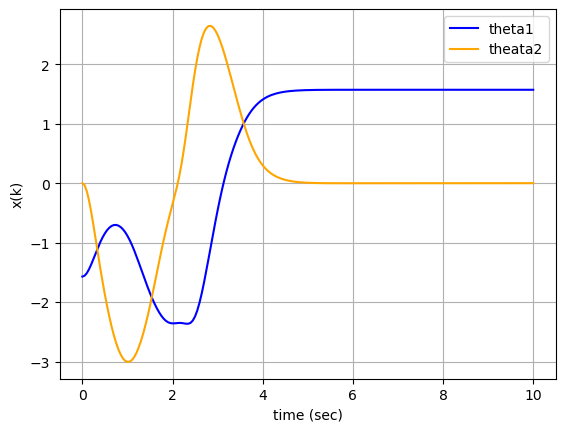

In [21]:
plot_x()

รูปที่ 5.2 แนววิถีเหมาะที่สุดของสถานะ $\theta_1$ และ $\theta_2$

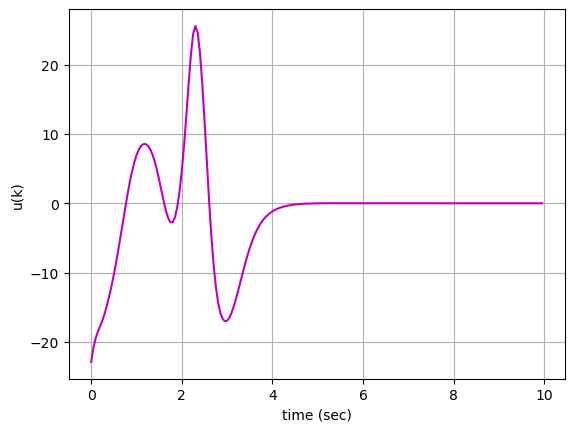

In [22]:
plot_u()

รูปที่ 5.3 แนววิถีเหมาะที่สุดของตัวควบคุม $u$ 

รันโค้ดในเซลล์ด้านล่างนี้ทั้งหมดเพื่อจำลองการเคลื่อนที่ของหุ่นยนต์กายกรรมโดย meshcat 
ดังเช่นในรูปที่ 5.4

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch5_acrobot_meshcat.png" width=400 />

รูปที่ 5.4 การจำลองหุ่นยนต์กายกรรมบน meshcat

(หากยังไม่ได้ติดตั้งต้องใช้คำสั่ง !pip install meshcat) 
ผลการจำลองจะมีลักษณะดังแสดงใน [วีดีโอนี้](https://youtu.be/qkP1aVt2a-8)

In [23]:
import meshcat
import meshcat.geometry as g
import meshcat.transformations as tf    
import time

In [24]:
vis = meshcat.Visualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [35]:
thick = 0.05
l1 = 1.0
l2 = 1.0

def build_acrobot(vis):
    acrobot = vis["acrobot"]
    base = acrobot["base"]
    pivot1 = acrobot["pivot1"]
    link1 = pivot1["link1"]
    pivot2 = link1["pivot2"]
    hinge = link1["hinge"]
    link2 = pivot2["link2"]
    base.set_object(g.Sphere(thick))
    link1.set_object(g.Box([l1,thick,thick]))
    link1.set_transform(tf.translation_matrix([-l1/2,0,0]))
    pivot2.set_transform(tf.translation_matrix([-l1/2,0,0]))
    link2.set_object(g.Box([l2,thick,thick]))
    link2.set_transform(tf.translation_matrix([-l1/2,0,0]))
    hinge.set_object(g.Sphere(thick))
    hinge.set_transform(tf.translation_matrix([-l1/2,0,0]))

    return pivot1, pivot2

# update acrobot pose
def update_acrobot(pivot1,pivot2,th1,th2):
    pivot1.set_transform(tf.rotation_matrix(th1,[0,1,0]))
    pivot2.set_transform(tf.translation_matrix([-l1/2,0,0]).dot(tf.rotation_matrix(th2,[0,1,0])))

def simulate_acrobot():
    for k in range(xtraj.shape[1]):
        th1 = xtraj[0,k]
        th2 = xtraj[1,k]
        update_acrobot(pv1,pv2,th1,th2)
        time.sleep(h)

In [26]:
pv1,pv2 = build_acrobot(vis)
update_acrobot(pv1,pv2,-np.pi/2,0)

In [36]:
simulate_acrobot()

## บรรณานุกรม

1. D.Q. Mayne. "A second-order gradient method of optimizing non-linear discrete time systems". 
Int J Control. 3: 85–95. 1966.

2. D.Q. Mayne and D.H Jacobson. Differential dynamic programming. New York: American Elsevier 
Pub. Co. 1970.

3. Z. Manchester et.al. [16-745 Optimal Control & Reinforcement Learning, 
Course materials](https://optimalcontrol.ri.cmu.edu/#learning-resources), Carnegie Mellon University. 2025.

4. R.M. Murray and J. Hauser. "A case study in approximate linerization: the acrobot example". 
Memorandum No. UCB/ERL (unknown). 1991.  

5. R. Tedrake. [Underactuated Robotics: Algorithms for Walking, Running, Swimming, Flying, and Manipulation (Course Notes for MIT 6.832)](https://underactuated.csail.mit.edu). 2023. 


<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/refs/heads/master/dewninja_logo50.jpg" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2025</div>